- Deep Neural Network
- Caffe Framework

# 1.File Upload
model_name = 'res10_300x300_ssd_iter_140000.caffemodel'

prototxt_name = 'deploy.prototxt.txt'

file_name = 'obama_01.jpeg, obama_02.jpeg, obama_03.jpg'

In [ ]:
from google.colab import files
files.upload()

Saving deploy.prototxt.txt to deploy.prototxt.txt
Saving obama_01.jpeg to obama_01.jpeg
Saving obama_02.jpeg to obama_02.jpeg
Saving obama_03.jpg to obama_03.jpg
Saving res10_300x300_ssd_iter_140000.caffemodel to res10_300x300_ssd_iter_140000.caffemodel


In [ ]:
!ls -al

total 10676
drwxr-xr-x 1 root root     4096 Sep 30 12:07 .
drwxr-xr-x 1 root root     4096 Sep 30 12:03 ..
drwxr-xr-x 4 root root     4096 Sep 28 13:26 .config
-rw-r--r-- 1 root root    28092 Sep 30 12:07 deploy.prototxt.txt
-rw-r--r-- 1 root root     9532 Sep 30 12:07 obama_01.jpeg
-rw-r--r-- 1 root root     5172 Sep 30 12:07 obama_02.jpeg
-rw-r--r-- 1 root root   194499 Sep 30 12:07 obama_03.jpg
-rw-r--r-- 1 root root 10666211 Sep 30 12:07 res10_300x300_ssd_iter_140000.caffemodel
drwxr-xr-x 1 root root     4096 Sep 28 13:26 sample_data


# 2. Load File

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
model_name = 'res10_300x300_ssd_iter_140000.caffemodel'
prototxt_name = 'deploy.prototxt.txt'
file_name = 'obama_02.jpeg'

In [ ]:
min_confidence = 0.3
frame_width = 300
frame_height = 300

In [ ]:
frame = cv2.imread(file_name)
(height, width) = frame.shape[:2]
print(height, width)

178 283


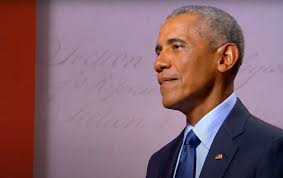

In [ ]:
cv2_imshow(frame)

# 3. DNN Model

In [ ]:
model = cv2.dnn.readNetFromCaffe(prototxt_name, model_name)

In [ ]:
blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300, 300)), 1.0, (frame_width, frame_height), (104.0, 177.0, 123.0))
# cv2.resize(frame, (300, 300)) input 이미지 조절
# 1.0 : Scale 이미지 스케일 조정
# (frame_width, frame_height) : 목적지 이미지
# (104.0, 177.0, 123.0) : 각 채널의 평균값, 데이터에 맞게 정규화

In [ ]:
model.setInput(blob) # 모델 Input에 blob 전달
detections = model.forward() # 검출 된 배열
print(detections)

[[[[0.         1.         0.97053367 ... 0.08084379 0.76460886
    0.57922584]
   [0.         1.         0.12442376 ... 4.0106487  4.842023
    4.986066  ]
   [0.         1.         0.12279325 ... 3.997507   0.84011257
    4.9882755 ]
   ...
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]]]]


In [ ]:
detections.shape

(1, 1, 200, 7)

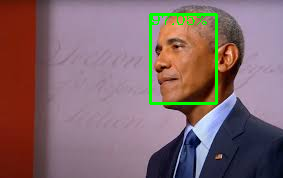

In [ ]:
for i in range(0, detections.shape[2]):
  # extract the confidence (i.e., probability)
  confidence = detections[0, 0, i, 2]
  if confidence > min_confidence:
    box = detections[0, 0, i, 3:7] * np.array([width, height, width, height])
    (startX, startY, endX, endY) = box.astype('int')
    text = '{:.2f}%'.format(confidence * 100)
    y = startY - 10 if startY-10 > 10 else startY+10
    cv2.rectangle(frame, (startX, startY), (endX, endY), (0, 255, 0), 2)
    cv2.putText(frame, text, (startX, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 255, 0), 1)
cv2_imshow(frame)

# 1. File Load
model_name = 'res10_300x300_ssd_iter_140000.caffemodel'

prototxt_name = 'deploy.prototxt.txt'

file_name = 'obama_01.mp4'

In [ ]:
from google.colab import files
files.upload()

Saving deploy.prototxt.txt to deploy.prototxt.txt
Saving obama_01.mp4 to obama_01.mp4
Saving res10_300x300_ssd_iter_140000.caffemodel to res10_300x300_ssd_iter_140000.caffemodel


In [ ]:
!ls -al

total 19336
drwxr-xr-x 1 root root     4096 Oct  1 13:13 .
drwxr-xr-x 1 root root     4096 Oct  1 13:04 ..
drwxr-xr-x 4 root root     4096 Sep 28 13:26 .config
-rw-r--r-- 1 root root    28092 Oct  1 13:13 deploy.prototxt.txt
-rw-r--r-- 1 root root  9083585 Oct  1 13:13 obama_01.mp4
-rw-r--r-- 1 root root 10666211 Oct  1 13:13 res10_300x300_ssd_iter_140000.caffemodel
drwxr-xr-x 1 root root     4096 Sep 28 13:26 sample_data


# 2. Load File

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import IPython

In [ ]:
model_name = 'res10_300x300_ssd_iter_140000.caffemodel'
prototxt_name = 'deploy.prototxt.txt'
file_name = 'obama_01.mp4'

In [ ]:
min_confidence = 0.3
frame_width = 300
frame_height = 300

# 3.DNN Model

In [ ]:
model = cv2.dnn.readNetFromCaffe(prototxt_name, model_name)

In [ ]:
def detectAndDisplay(frame):
  IPython.display.clear_output(wait=True)
  blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))
  model.setInput(blob)
  detections = model.forward()
  for i in range(0, detections.shape[2]):
  # extract the confidence (i.e., probability)
    confidence = detections[0, 0, i, 2]
    if confidence > min_confidence:
      (height, width) = frame.shape[:2]
      box = detections[0, 0, i, 3:7] * np.array([width, height, width, height])
      (startX, startY, endX, endY) = box.astype('int')
      print(confidence, startX, startY, endX, endY)
      text = '{:.2f}%'.format(confidence * 100)
      y = startY - 10 if startY-10 > 10 else startY+10
      cv2.rectangle(frame, (startX, startY), (endX, endY), (0, 255, 0), 2)
      cv2.putText(frame, text, (startX, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 255, 0), 1)
  cv2_imshow(frame)

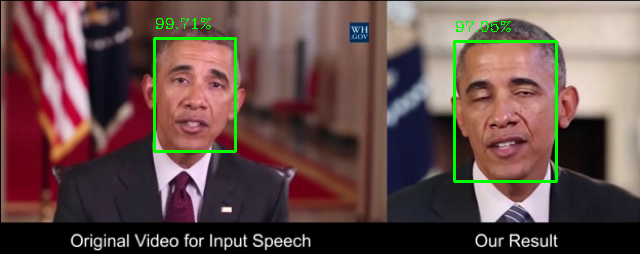

--(!) No captured frame -- Break!


In [ ]:
#-- 2. Read the video stream
cap = cv2.VideoCapture(file_name)

if not cap.isOpened:
  print('--(!)Error opening video capture')
  exit(0)

while True:
  ret, frame = cap.read()
  if frame is None:
    print('--(!) No captured frame -- Break!')
    break
  detectAndDisplay(frame)